In [1]:
# What is the average pricing for a 2 bedroom / 2 bathrooms home by State /
  


In [2]:
#import stuff
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

In [3]:
#Access the file and read it.
clean_states = Path('clean_states.csv') 
clean_states_df = pd.read_csv(clean_states)

clean_states_df.head()

,Unnamed: 0,price,bed,bath,acre_lot,house_size,state,city
0,27821,579900.0,4.0,3.0,2.34,3320.0,Connecticut,Coventry
1,27826,215000.0,2.0,1.0,0.91,960.0,Connecticut,East Windsor
2,27828,144900.0,2.0,1.0,0.36,860.0,Connecticut,Vernon
3,27829,174900.0,3.0,2.0,0.19,1280.0,Connecticut,Manchester
4,27830,289900.0,4.0,2.0,0.38,1617.0,Connecticut,East Windsor


In [4]:
# make dataframe that only includes price, bed room , bathroom, and state

limited_df = clean_states_df[['price', 'bed', 'bath','state']].copy().reset_index(drop=True)
limited_df.head()

,price,bed,bath,state
0,579900.0,4.0,3.0,Connecticut
1,215000.0,2.0,1.0,Connecticut
2,144900.0,2.0,1.0,Connecticut
3,174900.0,3.0,2.0,Connecticut
4,289900.0,4.0,2.0,Connecticut


In [5]:
limited_df.dtypes


price    float64
bed      float64
bath     float64
state     object
dtype: object

In [6]:
#filter that dataframe into only values that both equal 2 bedroom and 2 bathroom.
#Sam Espe helped with this equation
bed_and_bath_df=limited_df[(limited_df['bed']== 2.0) & (limited_df['bath']==2.0)]
#print(bed_and_bath_df)


average_bedbath= bed_and_bath_df["price"].mean().round(2)
#print(average_bedbath)




In [7]:
# create a dataframe that only shows MASS
mass_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'Massachusetts']
mass_df


average_mass= mass_df["price"].mean()
average_mass=average_mass.round(2)
#print(average_mass)
print(mass_df)

           price  bed  bath          state
63482   397000.0  2.0   2.0  Massachusetts
63488   389900.0  2.0   2.0  Massachusetts
63501   275000.0  2.0   2.0  Massachusetts
63513   189900.0  2.0   2.0  Massachusetts
63568   595000.0  2.0   2.0  Massachusetts
...          ...  ...   ...            ...
134422  209900.0  2.0   2.0  Massachusetts
134431  709000.0  2.0   2.0  Massachusetts
134447  369000.0  2.0   2.0  Massachusetts
134455  139000.0  2.0   2.0  Massachusetts
134458  709000.0  2.0   2.0  Massachusetts

[5192 rows x 4 columns]


In [8]:
# create a dataframs that only shows CONN and price column
conn_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'Connecticut']
conn_df

conn_df
average_conn= conn_df["price"].mean()
average_conn=average_conn.round(2)
#print(average_conn)
print(conn_df)

          price  bed  bath        state
23     329000.0  2.0   2.0  Connecticut
147    247900.0  2.0   2.0  Connecticut
181    199900.0  2.0   2.0  Connecticut
247    264800.0  2.0   2.0  Connecticut
259    237500.0  2.0   2.0  Connecticut
...         ...  ...   ...          ...
49714  465000.0  2.0   2.0  Connecticut
49717  419000.0  2.0   2.0  Connecticut
49719  499000.0  2.0   2.0  Connecticut
49743  759000.0  2.0   2.0  Connecticut
49746  360000.0  2.0   2.0  Connecticut

[2012 rows x 4 columns]


In [9]:
#create a dataframe that only shows NEW JERSEY
nj_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'New Jersey']
nj_df

average_nj= nj_df["price"].mean()
average_nj=average_nj.round(2)
#print(average_nj)
#print(nj_df)

In [10]:
#create a dataframe that only shows NEW YORK 
ny_df=bed_and_bath_df.loc[bed_and_bath_df['state'] == 'New York']

average_ny= ny_df["price"].mean()
average_ny=average_ny.round(2)
#print(average_ny)
#print(ny_df)


In [11]:
#Do the average of the price column for MASS, CONN, NEW JERSEY, and NEW YORK
print ("The average New York house price is "+ str (average_ny) + "." )
print ("The average New Jersey house price is "+ str (average_nj) + "." )
print ("The average Massachusetts house price is "+ str (average_mass) + "." )
print ("The average Connectitcut house price is "+ str (average_conn) + "." )
print ("The average house price for all the states together is "+ str (average_bedbath) + "." )


The average New York house price is 744144.74.
The average New Jersey house price is 312192.49.
The average Massachusetts house price is 656750.34.
The average Connectitcut house price is 277389.77.
The average house price for all the states together is 470297.73.


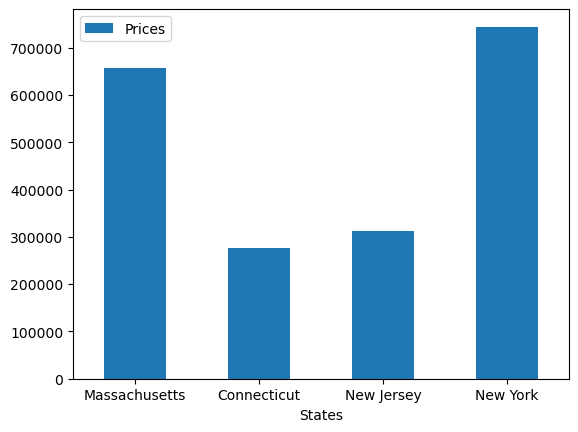

In [12]:
#Make a bar graph with the average for each state
bar_plot_df = pd.DataFrame({'States':['Massachusetts', 'Connecticut', 'New Jersey','New York'], 'Prices':[average_mass, average_conn, average_nj,average_ny,]})
ax = bar_plot_df.plot.bar(x='States', y='Prices', rot=0)

In [13]:
price_state_ny_df = ny_df[['price','state']].copy()
#price_state_ny_df


In [14]:
price_state_df = bed_and_bath_df[['price','state']].copy()
#price_state_df 

In [15]:
next_df= price_state_df.set_index([price_state_df.groupby('state')['state'].cumcount(), 'state'])['price'].unstack()

next_df


state,Connecticut,Massachusetts,New Jersey,New York
0,329000.0,397000.0,339900.0,129900.0
1,247900.0,389900.0,499000.0,150000.0
2,199900.0,275000.0,389900.0,160000.0
3,264800.0,189900.0,459000.0,179000.0
4,237500.0,595000.0,315000.0,160000.0
...,...,...,...,...
5570,NaN,NaN,279900.0,NaN
5571,NaN,NaN,260000.0,NaN
5572,NaN,NaN,295000.0,NaN
5573,NaN,NaN,350000.0,NaN


Text(0, 0.5, 'Frequency')

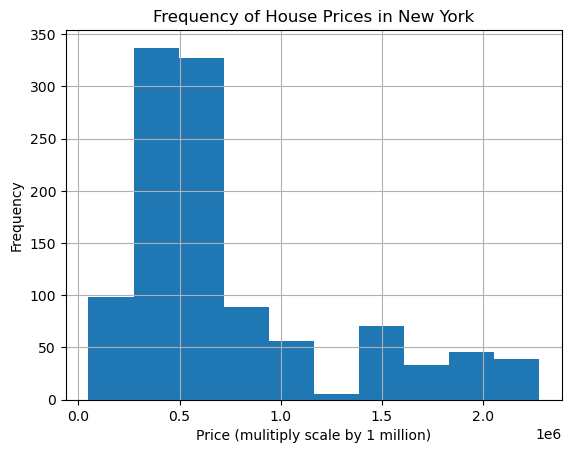

In [16]:
ny_df.hist(column='price')
plt.title("Frequency of House Prices in New York")
plt.xlabel("Price (mulitiply scale by 1 million)")
plt.ylabel("Frequency")


In [17]:
price_state_nj_df = nj_df[['price','state']].copy()
#price_state_nj_df


Text(0, 0.5, 'Frequency')

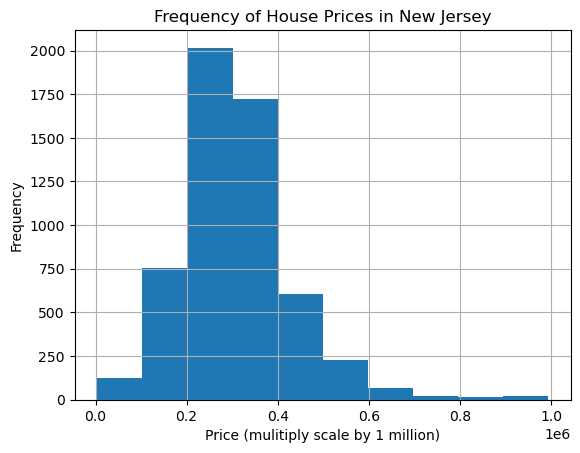

In [18]:
price_state_nj_df.hist(column='price')

plt.title("Frequency of House Prices in New Jersey")
plt.xlabel("Price (mulitiply scale by 1 million)")
plt.ylabel("Frequency")


In [19]:
price_state_conn_df = conn_df[['price','state']].copy()
#price_state_conn_df

array([[<Axes: title={'center': 'price'}>]], dtype=object)

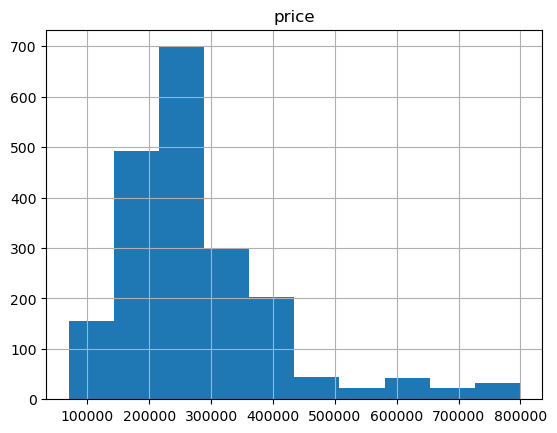

In [20]:
price_state_conn_df.hist(column='price')

In [21]:
price_state_mass_df = mass_df[['price','state']].copy()

#price_state_mass_df

Text(0, 0.5, 'Frequency')

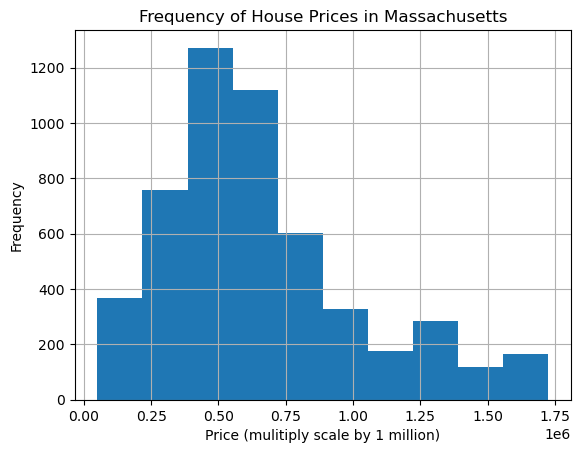

In [22]:

mass_df.hist(column='price')
plt.title("Frequency of House Prices in Massachusetts")
plt.xlabel("Price (mulitiply scale by 1 million)")
plt.ylabel("Frequency")


In [23]:

next_df= price_state_df.set_index([price_state_df.groupby('state')['state'].cumcount(), 'state'])['price'].unstack()

next_df


state,Connecticut,Massachusetts,New Jersey,New York
0,329000.0,397000.0,339900.0,129900.0
1,247900.0,389900.0,499000.0,150000.0
2,199900.0,275000.0,389900.0,160000.0
3,264800.0,189900.0,459000.0,179000.0
4,237500.0,595000.0,315000.0,160000.0
...,...,...,...,...
5570,NaN,NaN,279900.0,NaN
5571,NaN,NaN,260000.0,NaN
5572,NaN,NaN,295000.0,NaN
5573,NaN,NaN,350000.0,NaN
